In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

This project classifies whether pneumonia is present in lungs. While MDs are successful at reading lung x-rays for pneumonia, an algorithm can be just as usefull for determining the illness.   This project uses convolutional neural networks(CNN) to determine whether images of lungs have pneumonia in them.  The null hypothesis is that the CNN will perform worse than an MD and the alternative hypothesis is that the CNN will perform as well as an MD.    

Load the data.

In [2]:
directory_train=r"/Users/owner/Downloads/chest_xray/train"
directory_val = r"/Users/owner/Downloads/chest_xray/val"
directory_test = r"/Users/owner/Downloads/chest_xray/test"

# Feature Engineering

In [3]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = datagen.flow_from_directory(
        # This is the target directory
        directory_train,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5216,
#         Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = datagen.flow_from_directory(directory_val,
                                                        target_size=(150, 150),
                                                        batch_size=16,
                                                        class_mode='binary')
test_generator = datagen.flow_from_directory(directory_test,
                                                        target_size=(150, 150),
                                                        batch_size=624,
                                                        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(validation_generator)

# Data Mining

In [5]:
train_images.shape

(5216, 150, 150, 3)

In [6]:
train_images.mean()

0.48229617

In [7]:
val_images.mean()

0.4897651

In [8]:
train_images.std()

0.23764004

In [9]:
val_images.std()

0.2565853

The train and val images are similarly distributed.

# Feature Exploration

Dense structures block radiation and appear as white while structures that are less dense appear black. When the air sacs in lungs are filled with fluid the sacs are denser, and therefore, cloud the lungs in an x-ray.  MDs will diagnose patient with pneumonia, even if a chest x-ray appears negative, if the patient has symptoms of pneumonia. 

class 0.0


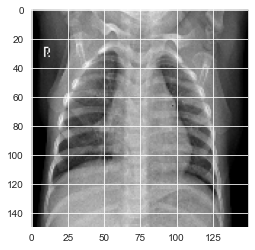

In [257]:
plt.imshow(train_images[0], cmap="gray")
print("class", train_labels[0])
#plt.savefig('0.png')
plt.show()

class 1.0


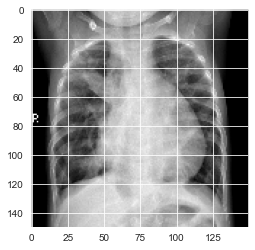

In [293]:
plt.imshow(train_images[1], cmap="gray")
print("class", train_labels[1])
#plt.savefig('1.png')
plt.show()

These are distributions of the matrices of the previous x-ray images.  

In [228]:
train_images[0][0]

array([[0.        , 0.        , 0.        ],
       [0.00392157, 0.00392157, 0.00392157],
       [0.07843138, 0.07843138, 0.07843138],
       [0.08627451, 0.08627451, 0.08627451],
       [0.10196079, 0.10196079, 0.10196079],
       [0.12941177, 0.12941177, 0.12941177],
       [0.15686275, 0.15686275, 0.15686275],
       [0.17254902, 0.17254902, 0.17254902],
       [0.20392159, 0.20392159, 0.20392159],
       [0.24705884, 0.24705884, 0.24705884],
       [0.27058825, 0.27058825, 0.27058825],
       [0.2901961 , 0.2901961 , 0.2901961 ],
       [0.30980393, 0.30980393, 0.30980393],
       [0.30588236, 0.30588236, 0.30588236],
       [0.34117648, 0.34117648, 0.34117648],
       [0.34117648, 0.34117648, 0.34117648],
       [0.3647059 , 0.3647059 , 0.3647059 ],
       [0.35686275, 0.35686275, 0.35686275],
       [0.3529412 , 0.3529412 , 0.3529412 ],
       [0.37254903, 0.37254903, 0.37254903],
       [0.43921572, 0.43921572, 0.43921572],
       [0.4784314 , 0.4784314 , 0.4784314 ],
       [0.

(array([[ 5.,  7.,  5., 18., 23., 20., 21., 17., 17., 17.],
        [ 5.,  7.,  5., 18., 23., 20., 21., 17., 17., 17.],
        [ 5.,  7.,  5., 18., 23., 20., 21., 17., 17., 17.]]),
 array([0.        , 0.08941177, 0.17882355, 0.26823533, 0.3576471 ,
        0.44705886, 0.53647065, 0.6258824 , 0.7152942 , 0.8047059 ,
        0.8941177 ], dtype=float32),
 <a list of 3 BarContainer objects>)

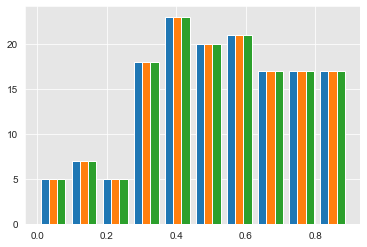

In [263]:
plt.hist(train_images[0][0])
#plt.savefig('image_distribution.png')

In [294]:
train_images[1][1]

array([[0.14901961, 0.14901961, 0.14901961],
       [0.18039216, 0.18039216, 0.18039216],
       [0.20784315, 0.20784315, 0.20784315],
       [0.20784315, 0.20784315, 0.20784315],
       [0.22352943, 0.22352943, 0.22352943],
       [0.21960786, 0.21960786, 0.21960786],
       [0.20000002, 0.20000002, 0.20000002],
       [0.23529413, 0.23529413, 0.23529413],
       [0.45098042, 0.45098042, 0.45098042],
       [0.36078432, 0.36078432, 0.36078432],
       [0.34901962, 0.34901962, 0.34901962],
       [0.34509805, 0.34509805, 0.34509805],
       [0.34117648, 0.34117648, 0.34117648],
       [0.3372549 , 0.3372549 , 0.3372549 ],
       [0.37647063, 0.37647063, 0.37647063],
       [0.42352945, 0.42352945, 0.42352945],
       [0.4156863 , 0.4156863 , 0.4156863 ],
       [0.38823533, 0.38823533, 0.38823533],
       [0.43921572, 0.43921572, 0.43921572],
       [0.37254903, 0.37254903, 0.37254903],
       [0.3803922 , 0.3803922 , 0.3803922 ],
       [0.36862746, 0.36862746, 0.36862746],
       [0.

(array([[12.,  4., 13., 15., 31., 30.,  1.,  4., 12., 28.],
        [12.,  4., 13., 15., 31., 30.,  1.,  4., 12., 28.],
        [12.,  4., 13., 15., 31., 30.,  1.,  4., 12., 28.]]),
 array([0.        , 0.08117647, 0.16235295, 0.24352944, 0.3247059 ,
        0.4058824 , 0.48705888, 0.56823534, 0.6494118 , 0.7305883 ,
        0.8117648 ], dtype=float32),
 <a list of 3 BarContainer objects>)

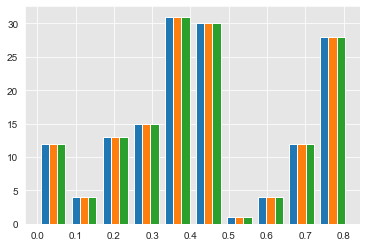

In [295]:
plt.hist(train_images[1][1])
#plt.savefig('image_distribution.png')

/opt/anaconda3/envs/t-tutorial/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

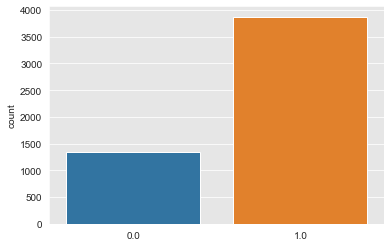

In [291]:
import seaborn as sns
sns.countplot(train_labels)

There is a class imbalance, we will resolve it with class weight hyperparameter.

# ANOVA Model

In [100]:
from scipy.stats import f_oneway

stat, p = f_oneway(val_images[0].flatten(),val_images[1].flatten(),val_images[2].flatten(),val_images[3].flatten(),
                  val_images[4].flatten(),val_images[5].flatten(),val_images[6].flatten(),val_images[7].flatten(),
                  val_images[8].flatten(),val_images[9].flatten(),val_images[10].flatten(),val_images[11].flatten(),
                  val_images[12].flatten(),val_images[13].flatten(),val_images[14].flatten(),val_images[15].flatten())
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=7619.679, p=0.000
Probably different distributions


The images are distinguishable from eachother.  

# CNN Model

In [5]:
import tensorflow as tf
from tensorflow import keras

A convolutional neural network (CNN) has an input, output, and multiple hidden layers. The hidden layers have a series of convolutional layers that produce the dot product of filter weights and pixel matrices. A filter is used to dimentionally reduce an image to find high frequency parts of the image. Kernel size specifies the dimensions of the filter.  An activation function determines neuron weight from one layer to the next.  The convolutional layer is followed by a pooling layer, which uses a filter to reduce the dimensions of the convoluted result into fewer parameters.  The remaining layers after the flatten layer classify the image.  

This model begins with convolutional layers of 64 filters with a kernel size of 3, 128 filters with a kernel size of 3, and then 256 filters with a kernel size of 3.  The activation function used for this model is ReLU followed by Sigmoid for binary output. The model has pooling layers with a filter size of 2.

In [6]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu',),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 256)       5

The Loss value implies how poorly the model is after each iteration of optimization.  Loss increases as the predicted probability diverges from the actual label.  The optimizer alters the model weights and learning rate to reduce the loss.  SGD calculates which way the weights should be altered so that the function can reach a minima.  Accuracy is the ratio of true occurences to true and false occurences.  Precision is the ratio of true positives to all positives.  Recall is the ratio of true positives to all actual true values.  F1 is the harmonic mean of precision and recall.    

In [8]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision_m = precision(y_true, y_pred)
    recall_m = recall(y_true, y_pred)
    return 2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon()))


In [9]:
from keras.optimizers import SGD

sgd = SGD(learning_rate=0.01)
model1.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy",precision,recall,f1])

In [15]:
history = model1.fit(train_images, train_labels, epochs=10, class_weight={0: .5,1: .5}, validation_data=(val_images, val_labels))

y_pred = (model1.predict(train_images) > 0.5).astype("int32")

Epoch 1/10
163/163 [==============================] - 665s 4s/step - loss: 0.2217 - accuracy: 0.7962 - precision: 0.8193 - recall: 0.9566 - f1: 0.8717 - val_loss: 1.7980 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000 - val_f1: 0.6957
Epoch 2/10
163/163 [==============================] - 660s 4s/step - loss: 0.1630 - accuracy: 0.8591 - precision: 0.8976 - recall: 0.9278 - f1: 0.9023 - val_loss: 0.8756 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_f1: 0.7273
Epoch 3/10
163/163 [==============================] - 674s 4s/step - loss: 0.1224 - accuracy: 0.8949 - precision: 0.9252 - recall: 0.9398 - f1: 0.9287 - val_loss: 0.7118 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_f1: 0.7273
Epoch 4/10
163/163 [==============================] - 678s 4s/step - loss: 0.1024 - accuracy: 0.9172 - precision: 0.9414 - recall: 0.9504 - f1: 0.9436 - val_loss: 0.6336 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.00

In [155]:
model1.save('CNN1.h5')

In [156]:
dependencies = {
    'precision': precision,
    'recall': recall,
    'f1': f1
}
model1 = keras.models.load_model('CNN1.h5',custom_objects=dependencies)
model1

The graph shows that accuracy, precision, recall, and f1 increas and loss decreases as the epochs increase for both the training and validation set. 

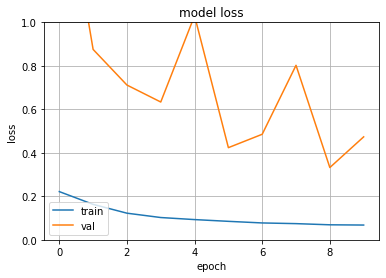

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

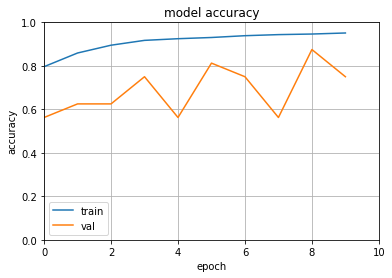

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

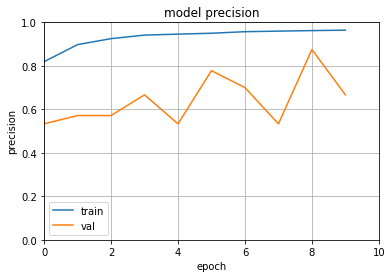

In [23]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

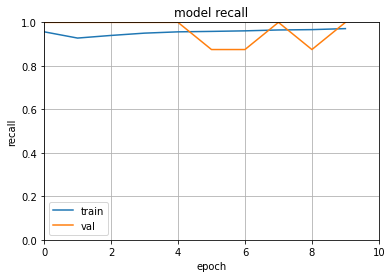

In [24]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

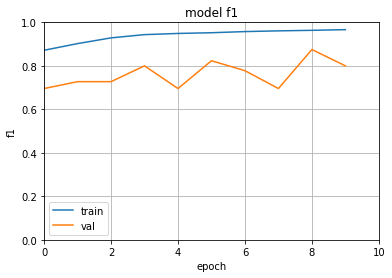

In [25]:
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(train_labels, y_pred))
cm


Confusion Matrix
----------------


,0,1
0,1201,140
1,76,3799


Roc is the true positive to false positive rate.

In [ ]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns


def roc(y,y_hat):
    false_positive_train_rate, true_positive_train_rate, thresholds = roc_curve(y,y_hat)
    roc_auc = auc(false_positive_train_rate, true_positive_train_rate)

    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(false_positive_train_rate, true_positive_train_rate, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
    plt.legend(loc='lower right')
    print('AUC: {}'.format(auc(false_positive_train_rate, true_positive_train_rate)))
    plt.show()

AUC: 0.9379936975295279


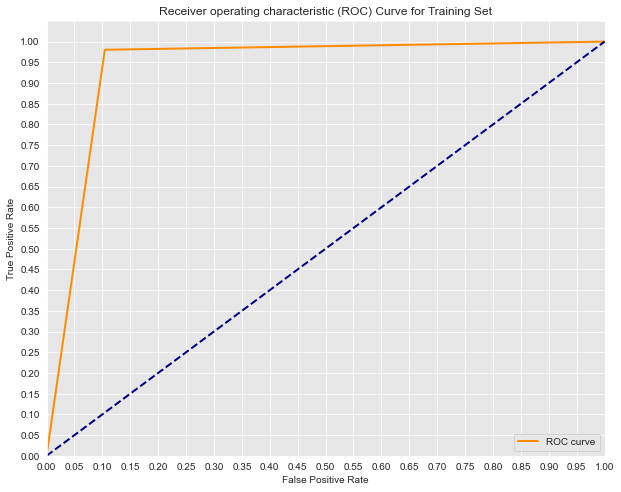

In [30]:
roc(train_labels, y_pred)

In [31]:
from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# K-fold Cross Validation model evaluation
fold_no = 1
cvscores=[]
for train, test in kfold.split(train_images,train_labels):

    # create model
    model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu',),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                        optimizer=sgd,
                        metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the model
    model.fit(train_images[train], train_labels[train], epochs=10, batch_size=10, verbose=1)
    # evaluate the model
    scores = model.evaluate(train_images[test], train_labels[test], verbose=1)
    cvscores.append(scores[1] * 100)
    fold_no+=1
print(f'Mean CV Score:{np.mean(cvscores)}')
print(f'Standard Deviation CV Score:{np.std(cvscores)}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
418/418 [==============================] - 520s 1s/step - loss: 0.4825 - accuracy: 0.7812
Epoch 2/10
418/418 [==============================] - 516s 1s/step - loss: 0.2315 - accuracy: 0.9096
Epoch 3/10
418/418 [==============================] - 519s 1s/step - loss: 0.1615 - accuracy: 0.9415
Epoch 4/10
418/418 [==============================] - 528s 1s/step - loss: 0.1386 - accuracy: 0.9487
Epoch 5/10
418/418 [==============================] - 523s 1s/step - loss: 0.1145 - accuracy: 0.9583
Epoch 6/10
418/418 [==============================] - 533s 1s/step - loss: 0.1033 - accuracy: 0.9648
Epoch 7/10
418/418 [==============================] - 527s 1s/step - loss: 0.0905 - accuracy: 0.9696
Epoch 8/10
418/418 [==============================] - 519s 1s/step - loss: 0.0841 - accuracy: 0.9705
Epoch 9/10
418/418 [==============================] - 512s 1s/step - loss: 0.0784 - accuracy: 0

Regularization modifies the learning algorithm so that the model generalizes better. L2 and L1 regularization add a penalty term that adjusts the loss function by decreasing the weight matices, reducing model overfitting.  The regularization term differs in L1 and L2.  In L1 lamda is the absolute value and decreases the weights toward and possibly to zero.  In L2 the penalty term, lambda, is squared and decreases the weights toward zero but not exactly zero.  This model uses L2 regularization.

In [148]:
from keras.regularizers import l2

model2 = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'
                       ),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)
                       ),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [149]:
model2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 144, 144, 64)      9472      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 68, 68, 128)       147584    
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 30, 30, 256)     

In [150]:
model2.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy",precision,recall,f1])

In [151]:
history2 = model2.fit(train_images, train_labels, epochs=10,class_weight={0: .5,1: .5}, validation_data=(val_images, val_labels))

y_pred2 = (model2.predict(train_images) > 0.5).astype("int32")

Epoch 1/10
163/163 [==============================] - 676s 4s/step - loss: 0.2854 - accuracy: 0.7435 - precision: 0.7460 - recall: 0.9938 - f1: 0.8474 - val_loss: 0.6619 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_f1: 0.7273
Epoch 2/10
163/163 [==============================] - 671s 4s/step - loss: 0.2248 - accuracy: 0.7977 - precision: 0.8395 - recall: 0.9295 - f1: 0.8634 - val_loss: 0.9217 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_f1: 0.7273
Epoch 3/10
163/163 [==============================] - 671s 4s/step - loss: 0.1653 - accuracy: 0.8685 - precision: 0.9010 - recall: 0.9366 - f1: 0.9121 - val_loss: 0.5082 - val_accuracy: 0.6875 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1: 0.6667
Epoch 4/10
163/163 [==============================] - 681s 4s/step - loss: 0.1300 - accuracy: 0.8999 - precision: 0.9284 - recall: 0.9433 - f1: 0.9312 - val_loss: 0.4368 - val_accuracy: 0.8125 - val_precision: 0.7778 - val_recall: 0.87

In [161]:
model2.save('CNN2.h5')

In [162]:
model2 = keras.models.load_model('CNN2.h5',custom_objects=dependencies)
model2

The graph shows that accuracy, precision, recall, and f1 increas and loss decreases as the epochs increase for both the training and validation set.

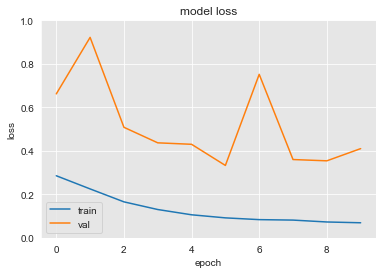

In [163]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

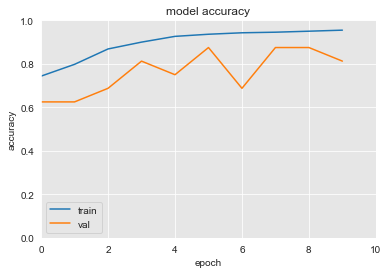

In [164]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

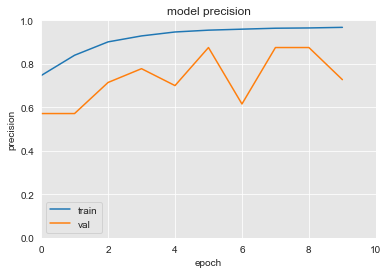

In [167]:
plt.plot(history2.history['precision'])
plt.plot(history2.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

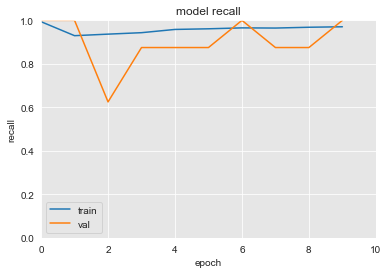

In [168]:
plt.plot(history2.history['recall'])
plt.plot(history2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

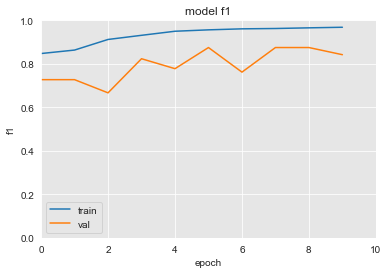

In [169]:
plt.plot(history2.history['f1'])
plt.plot(history2.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [296]:
print('\nTrain Confusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(train_labels, y_pred2))
cm


Train Confusion Matrix
----------------


,0,1
0,1212,129
1,73,3802


AUC: 0.9424822111568161


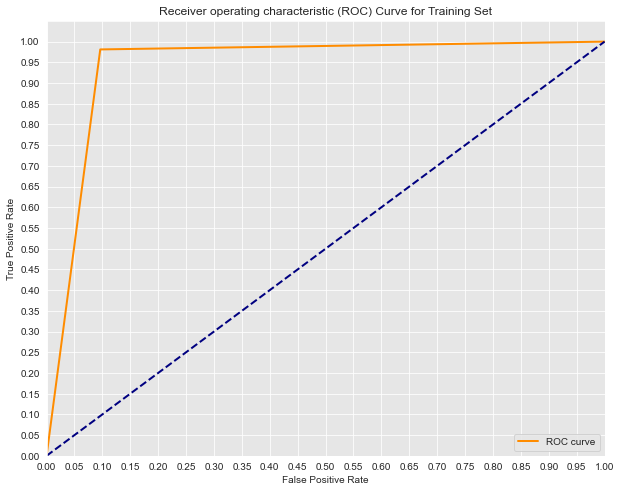

In [171]:
roc(train_labels, y_pred2)

Cross validation (cv) is a resampling method that evaluates a model by splitting the data into k folds and both trainig and testing on each fold.

In [172]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# K-fold Cross Validation model evaluation
fold_no = 1
cvscores=[]
for train, test in kfold.split(train_images,train_labels):

    # create model
    model2 = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'
                       ),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)
                       ),
    keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                        optimizer=sgd,
                        metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the model
    model.fit(train_images[train], train_labels[train], epochs=10, batch_size=10, verbose=1)
    # evaluate the model
    scores = model.evaluate(train_images[test], train_labels[test], verbose=1)
    cvscores.append(scores[1] * 100)
    fold_no+=1
print(f'Mean CV Score:{np.mean(cvscores)}')
print(f'Standard Deviation CV Score:{np.std(cvscores)}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
418/418 [==============================] - 555s 1s/step - loss: 0.5698 - accuracy: 0.7361
Epoch 2/10
418/418 [==============================] - 565s 1s/step - loss: 0.4536 - accuracy: 0.7721
Epoch 3/10
418/418 [==============================] - 554s 1s/step - loss: 0.3348 - accuracy: 0.8516
Epoch 4/10
418/418 [==============================] - 557s 1s/step - loss: 0.2468 - accuracy: 0.8993
Epoch 5/10
418/418 [==============================] - 561s 1s/step - loss: 0.2099 - accuracy: 0.9161
Epoch 6/10
418/418 [==============================] - 557s 1s/step - loss: 0.1876 - accuracy: 0.9276
Epoch 7/10
418/418 [==============================] - 572s 1s/step - loss: 0.1618 - accuracy: 0.9391
Epoch 8/10
418/418 [==============================] - 566s 1s/step - loss: 0.1517 - accuracy: 0.9425
Epoch 9/10
418/418 [==============================] - 563s 1s/step - loss: 0.1348 - accuracy: 0

Dropout is a regularization technique that randomly turns off some neurons during each iteration of training. The model dropout probability is .5.

In [41]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu',),
    keras.layers.Conv2D(128, 3, activation='relu',),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [42]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 144, 144, 64)      9472      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 68, 68, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 256)      

In [43]:
model3.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy",precision,recall,f1])

In [44]:
history3 = model3.fit(train_images, train_labels, epochs=10,class_weight={0: .5,1: .5}, validation_data=(val_images, val_labels))

y_pred3 = (model3.predict(train_images) > 0.5).astype("int32")

Epoch 1/10
163/163 [==============================] - 690s 4s/step - loss: 0.3001 - accuracy: 0.7289 - precision: 0.7424 - recall: 0.9713 - f1: 0.8371 - val_loss: 0.8353 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_f1: 0.6667
Epoch 2/10
163/163 [==============================] - 679s 4s/step - loss: 0.2734 - accuracy: 0.7412 - precision: 0.7476 - recall: 0.9837 - f1: 0.8476 - val_loss: 0.6739 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - val_f1: 0.7273
Epoch 3/10
163/163 [==============================] - 692s 4s/step - loss: 0.2425 - accuracy: 0.7634 - precision: 0.7834 - recall: 0.9451 - f1: 0.8527 - val_loss: 0.6980 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000 - val_f1: 0.6957
Epoch 4/10
163/163 [==============================] - 716s 4s/step - loss: 0.2144 - accuracy: 0.7951 - precision: 0.8152 - recall: 0.9426 - f1: 0.8702 - val_loss: 0.6545 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.00

In [158]:
model3.save('CNN2.h5')

In [160]:
model3 = keras.models.load_model('CNN3.h5',custom_objects=dependencies)
model3

The graph shows that accuracy, precision, recall, and f1 increas and loss decreases as the epochs increase for both the training and validation set.

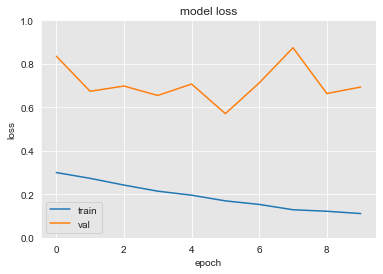

In [58]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

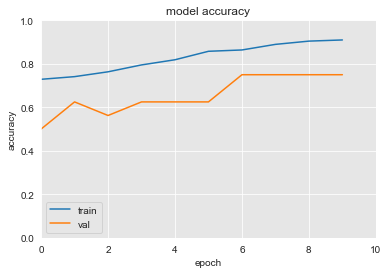

In [59]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

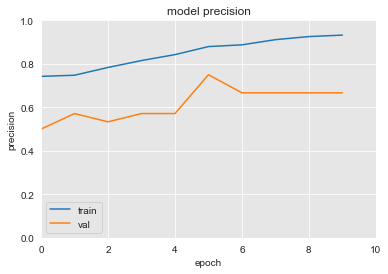

In [60]:
plt.plot(history3.history['precision'])
plt.plot(history3.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

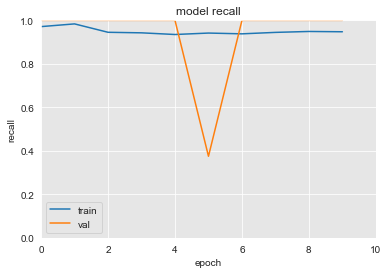

In [61]:
plt.plot(history3.history['recall'])
plt.plot(history3.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

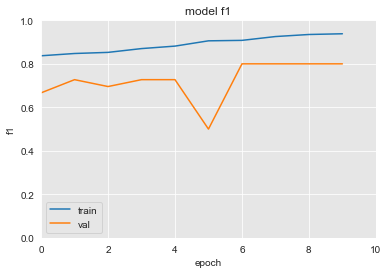

In [62]:
plt.plot(history3.history['f1'])
plt.plot(history3.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [55]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(train_labels, y_pred3))
cm


Confusion Matrix
----------------


,0,1
0,1122,219
1,83,3792


AUC: 0.907634841596305


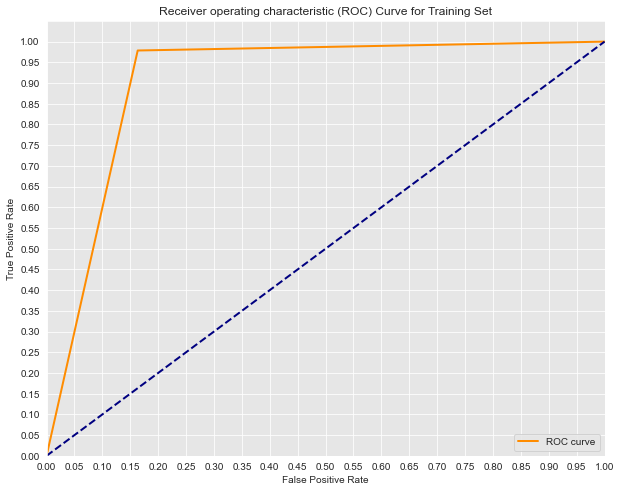

In [56]:
roc(train_labels, y_pred3)

In [57]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# K-fold Cross Validation model evaluation
fold_no = 1
cvscores3=[]
for train, test in kfold.split(train_images,train_labels):

    # create model
    model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu',),
    keras.layers.Conv2D(128, 3, activation='relu',),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                        optimizer=sgd,
                        metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the model
    model.fit(train_images[train], train_labels[train], epochs=10, batch_size=10, verbose=1)
    # evaluate the model
    scores = model.evaluate(train_images[test], train_labels[test], verbose=1)
    cvscores3.append(scores[1] * 100)
    fold_no+=1
print(f'Mean CV Score:{np.mean(cvscores3)}')
print(f'Standard Deviation CV Score:{np.std(cvscores3)}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
418/418 [==============================] - 560s 1s/step - loss: 0.5780 - accuracy: 0.7392
Epoch 2/10
418/418 [==============================] - 559s 1s/step - loss: 0.4446 - accuracy: 0.7929
Epoch 3/10
418/418 [==============================] - 572s 1s/step - loss: 0.2925 - accuracy: 0.8732
Epoch 4/10
418/418 [==============================] - 560s 1s/step - loss: 0.2327 - accuracy: 0.9080
Epoch 5/10
418/418 [==============================] - 569s 1s/step - loss: 0.1833 - accuracy: 0.9298
Epoch 6/10
418/418 [==============================] - 567s 1s/step - loss: 0.1662 - accuracy: 0.9398
Epoch 7/10
418/418 [==============================] - 558s 1s/step - loss: 0.1451 - accuracy: 0.9477
Epoch 8/10
418/418 [==============================] - 569s 1s/step - loss: 0.1394 - accuracy: 0.9477
Epoch 9/10
418/418 [==============================] - 614s 1s/step - loss: 0.1261 - accuracy: 0

Early stopping is a cross validation method that ends trainig once the performance on the validation set begins to decrease.

In [70]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu',),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [71]:
model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 70, 70, 128)       147584    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 33, 33, 256)       295168    
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 31, 31, 256)     

In [72]:
model4.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy",precision,recall,f1])

In [73]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

In [74]:
history4 = model4.fit(train_images, train_labels, epochs=10,class_weight={0: .5,1: .5}, validation_data=(val_images, val_labels)
                     ,callbacks=callbacks_list)

y_pred4 = (model4.predict(train_images) > 0.5).astype("int32")

Epoch 1/10
163/163 [==============================] - 654s 4s/step - loss: 0.2768 - accuracy: 0.7448 - precision: 0.7449 - recall: 0.9997 - f1: 0.8516 - val_loss: 1.0566 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_f1: 0.6667
Epoch 2/10
163/163 [==============================] - 655s 4s/step - loss: 0.2087 - accuracy: 0.8173 - precision: 0.8465 - recall: 0.9461 - f1: 0.8817 - val_loss: 0.5558 - val_accuracy: 0.7500 - val_precision: 0.8333 - val_recall: 0.6250 - val_f1: 0.7143
Epoch 3/10
163/163 [==============================] - 653s 4s/step - loss: 0.1490 - accuracy: 0.8762 - precision: 0.9064 - recall: 0.9368 - f1: 0.9146 - val_loss: 0.5595 - val_accuracy: 0.7500 - val_precision: 0.7000 - val_recall: 0.8750 - val_f1: 0.7778
Epoch 00003: early stopping


In [153]:
model4.save('CNN4.h5')

In [154]:
model4 = keras.models.load_model('CNN4.h5',custom_objects=dependencies)
model4

The graph shows that accuracy, precision, recall, and f1 increas and loss decreases as the epochs increase for both the training and validation set.

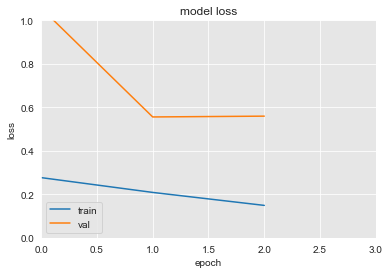

In [81]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,3)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

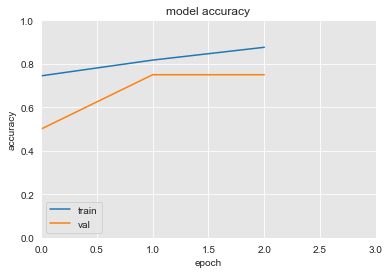

In [80]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,3)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

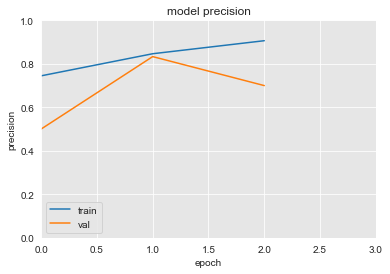

In [82]:
plt.plot(history4.history['precision'])
plt.plot(history4.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,3)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

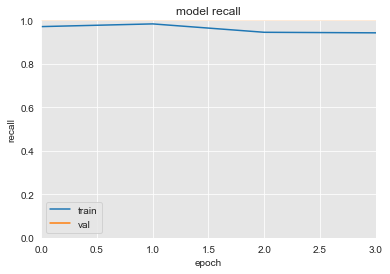

In [83]:
plt.plot(history3.history['recall'])
plt.plot(history3.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,3)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

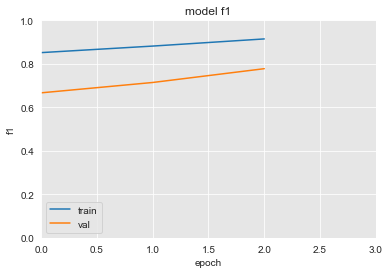

In [85]:
plt.plot(history4.history['f1'])
plt.plot(history4.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.gca().set_xlim(0,3)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [86]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(train_labels, y_pred4))
cm


Confusion Matrix
----------------


,0,1
0,1144,197
1,213,3662


AUC: 0.8990634817541074


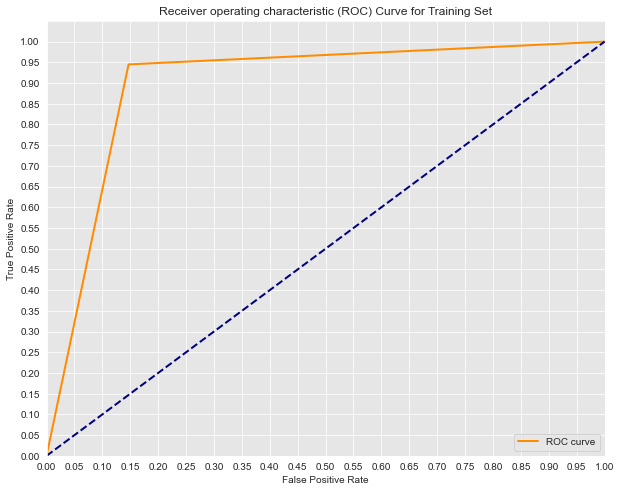

In [87]:
roc(train_labels, y_pred4)

CNN AUC: 0.9379936975295279
CNN-l2 AUC: 0.9424822111568161
CNN-dropout AUC: 0.9089251641769502
CNN-early-stopping AUC: 0.8990634817541074


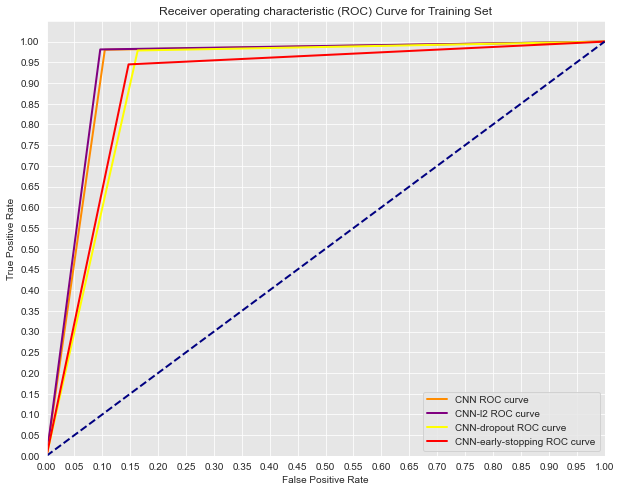

In [253]:
false_positive_train_rate, true_positive_train_rate, thresholds = roc_curve(train_labels,y_pred)
roc_auc = auc(false_positive_train_rate, true_positive_train_rate)

false_positive_train_rate2, true_positive_train_rate2, thresholds = roc_curve(train_labels,y_pred2)
roc_auc = auc(false_positive_train_rate, true_positive_train_rate)
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

false_positive_train_rate3, true_positive_train_rate3, thresholds = roc_curve(train_labels,y_pred3)
roc_auc = auc(false_positive_train_rate, true_positive_train_rate)
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

false_positive_train_rate4, true_positive_train_rate4, thresholds = roc_curve(train_labels,y_pred4)
roc_auc = auc(false_positive_train_rate, true_positive_train_rate)
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(false_positive_train_rate, true_positive_train_rate, color='darkorange',
             lw=lw, label='CNN ROC curve')
plt.plot(false_positive_train_rate2, true_positive_train_rate2, color='purple',
             lw=lw, label='CNN-l2 ROC curve')
plt.plot(false_positive_train_rate3, true_positive_train_rate3, color='yellow',
             lw=lw, label='CNN-dropout ROC curve')
plt.plot(false_positive_train_rate4, true_positive_train_rate4, color='red',
             lw=lw, label='CNN-early-stopping ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('CNN AUC: {}'.format(auc(false_positive_train_rate, true_positive_train_rate)))
print('CNN-l2 AUC: {}'.format(auc(false_positive_train_rate2, true_positive_train_rate2)))
print('CNN-dropout AUC: {}'.format(auc(false_positive_train_rate3, true_positive_train_rate2)))
print('CNN-early-stopping AUC: {}'.format(auc(false_positive_train_rate4, true_positive_train_rate4)))
#plt.savefig('ROC.png')
plt.show()

Test model

In [271]:
model2.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy",precision,recall,f1])

In [272]:
history2_test = model2.fit(test_images, test_labels, epochs=10,class_weight={0: .5,1: .5})

y_pred2_test = (model2.predict(test_images) > 0.5).astype("int32")

Epoch 1/10
20/20 [==============================] - 35s 2s/step - loss: 0.3164 - accuracy: 0.6330 - precision: 0.6288 - recall: 1.0000 - f1: 0.7695
Epoch 2/10
20/20 [==============================] - 35s 2s/step - loss: 0.2940 - accuracy: 0.7228 - precision: 0.7121 - recall: 0.9504 - f1: 0.8055
Epoch 3/10
20/20 [==============================] - 35s 2s/step - loss: 0.2916 - accuracy: 0.7212 - precision: 0.7644 - recall: 0.8796 - f1: 0.7811
Epoch 4/10
20/20 [==============================] - 36s 2s/step - loss: 0.2817 - accuracy: 0.7131 - precision: 0.7767 - recall: 0.8430 - f1: 0.7553
Epoch 5/10
20/20 [==============================] - 35s 2s/step - loss: 0.2925 - accuracy: 0.7067 - precision: 0.7611 - recall: 0.7698 - f1: 0.7182
Epoch 6/10
20/20 [==============================] - 35s 2s/step - loss: 0.2646 - accuracy: 0.7692 - precision: 0.7947 - recall: 0.9027 - f1: 0.8255
Epoch 7/10
20/20 [==============================] - 35s 2s/step - loss: 0.2502 - accuracy: 0.7804 - precision: 0

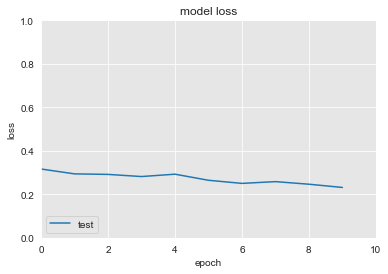

In [277]:
plt.plot(history2_test.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

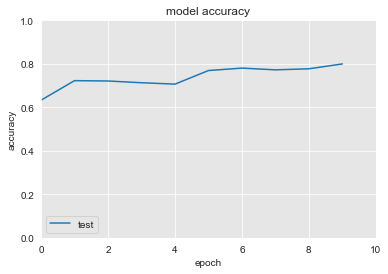

In [286]:
plt.plot(history2_test.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

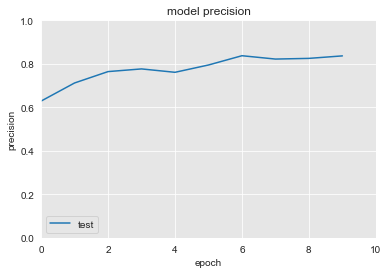

In [285]:
plt.plot(history2_test.history['precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

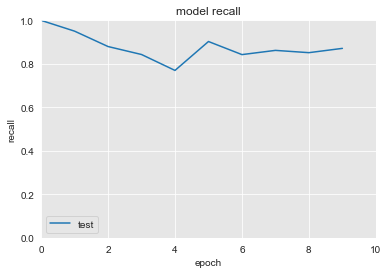

In [284]:
plt.plot(history2_test.history['recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

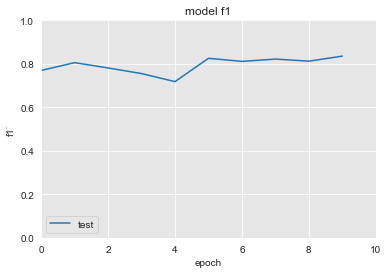

In [283]:
plt.plot(history2_test.history['f1'])
plt.title('model f1')
plt.ylabel('f1`')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower left')
plt.gca().set_xlim(0,10)
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [288]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(test_labels, y_pred2_test))
cm


Confusion Matrix
----------------


,0,1
0,53,181
1,0,390


AUC: 0.6132478632478633


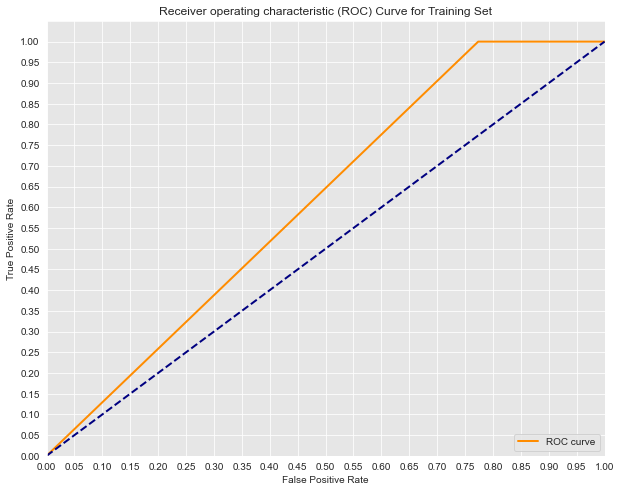

In [289]:
roc(test_labels, y_pred2_test)

The model classified 53 true negatives, 390 true positives, 181 false positives, and 0 false negatives.  If a doctor read the x-ray as negative but the patient had pneumonia symptoms, the doctor would treat the patient for pneumonia.  The model does not classify any patients who have pneumonia as healthy, but it does classify healthy patients as having pneumonia, similar to a doctor.  Therefore, we can reject the null hypothesis in favor of the alternative that the CNN performs as well as an MD.  